In [83]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [84]:
df_csv = pd.read_csv("/home/yuchi/Bike_Rental_Prediction/SeoulBikeData.csv")
df = pd.DataFrame(df_csv)
# 调用info()函数
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [85]:
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [86]:
print ( "Shape Of The Before Ouliers: ",df.shape)
#print(df["Rented Bike Count"].describe())
df = df[np.abs(df["Rented Bike Count"]-df["Rented Bike Count"].mean())<=(3*df["Rented Bike Count"].std())]
print ("Shape Of The After Ouliers: ",df.shape)

Shape Of The Before Ouliers:  (8760, 14)
Shape Of The After Ouliers:  (8693, 14)


In [87]:
data= df.copy()
data["date"] = data.Date.apply(lambda x : x.split()[0])
data["year"] = data.Date.apply(lambda x : x.split()[0].split("/")[2])
data["month"] = data.Date.apply(lambda x : x.split()[0].split("/")[0])
print(data)

            Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0     01/12/2017                254     0            -5.2           37   
1     01/12/2017                204     1            -5.5           38   
2     01/12/2017                173     2            -6.0           39   
3     01/12/2017                107     3            -6.2           40   
4     01/12/2017                 78     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0                  2.2              2000 

<ipython-input-88-9a5872b4e014>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Temperature(C)"],ax=axes[0][0])
<ipython-input-88-9a5872b4e014>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Dew point temperature(C)"],ax=axes[0][1])
<ipython-input-88-9a5872b4e014>:5: UserWarning: 

[Text(0.5, 0, 'Wind speed (m/s)'),
 Text(0.5, 1.0, 'distribution of Wind speed (m/s)')]

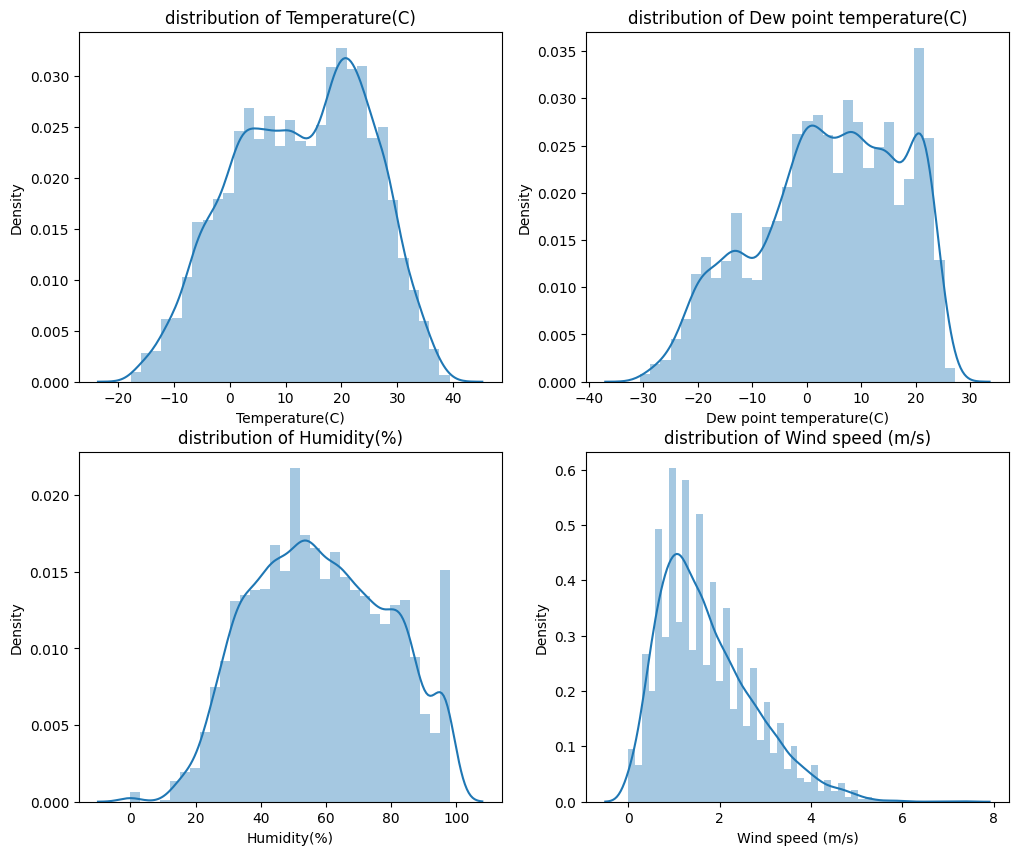

In [88]:

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.distplot(data["Temperature(C)"],ax=axes[0][0])
sns.distplot(data["Dew point temperature(C)"],ax=axes[0][1])
sns.distplot(data["Humidity(%)"],ax=axes[1][0])
sns.distplot(data["Wind speed (m/s)"],ax=axes[1][1])

axes[0][0].set(xlabel='Temperature(C)',title="distribution of Temperature(C)")
axes[0][1].set(xlabel='Dew point temperature(C)',title="distribution of Dew point temperature(C)")
axes[1][0].set(xlabel='Humidity(%)',title="distribution of Humidity(%)")
axes[1][1].set(xlabel='Wind speed (m/s)',title="distribution of Wind speed (m/s)")

           Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
107  05/12/2017                334    11            -3.9           25   
108  05/12/2017                321    12            -2.3           25   
109  05/12/2017                325    13            -1.6           27   
110  05/12/2017                334    14            -1.1           28   
111  05/12/2017                353    15            -0.7           28   

     Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
107               0.0              1959                     -21.0   
108               0.0              1962                     -19.7   
109               0.0              1955                     -18.2   
110               0.0              2000                     -17.3   
111               0.0              2000                     -16.9   

     Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
107                      0.0           0.0            0.0  Winter

<ipython-input-89-a1b7fe09488c>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Wind speed (m/s)"])


<Axes: xlabel='Wind speed (m/s)', ylabel='Density'>

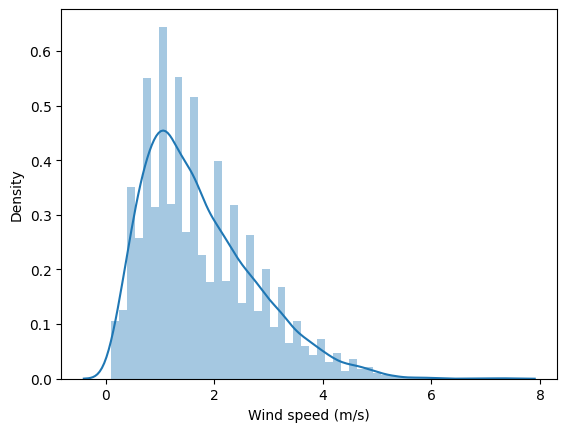

In [89]:
dataWind0 = data[data["Wind speed (m/s)"]==0]
dataWindNot0 = data[data["Wind speed (m/s)"]!=0]
rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)
windColumns = ["Humidity(%)","month","Temperature(C)","year","Dew point temperature(C)"] #"Seasons","weather"

rfModel_wind.fit(dataWindNot0[windColumns],dataWindNot0["Wind speed (m/s)"])

print(dataWind0.head())  # 確認 dataWind0 是否正確
print(dataWind0[windColumns].isnull().sum())  # 檢查是否有缺失值

wind0Values = rfModel_wind.predict(X=dataWind0[windColumns])
dataWind0["Wind speed (m/s)"] = wind0Values
data = pd.concat([dataWindNot0, dataWind0])
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
sns.distplot(data["Wind speed (m/s)"])


In [90]:
dataTrain = data[pd.notnull(data['Rented Bike Count'])].sort_values(by=["Date"])
dataTest = data[~pd.notnull(data['Rented Bike Count'])].sort_values(by=["Date"])
datetimecol = dataTest["Date"]
yLabels = dataTrain["Rented Bike Count"]
yLabelsLog = np.log(yLabels)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


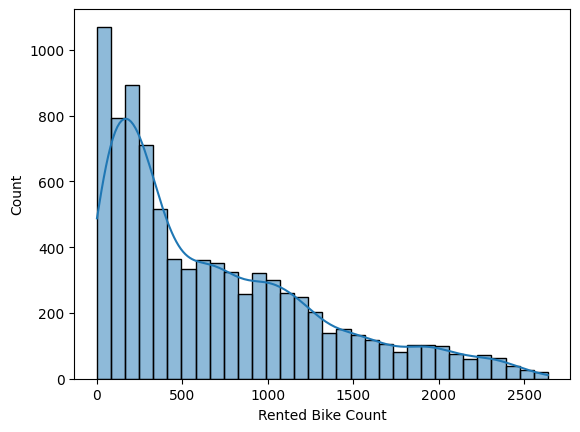

In [91]:
dropFeatures = ["Rented Bike Count","Date","date"]
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

sns.histplot(yLabels, kde=True)
plt.show()

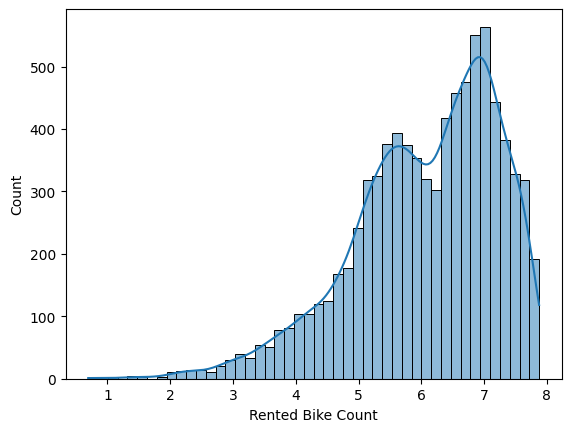

In [92]:
sns.histplot(yLabelsLog, kde=True)
plt.show()

In [93]:
'''
rfModel = RandomForestRegressor(n_estimators=1000,random_state=42)
yLabelsLog = np.log(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
'''

'\nrfModel = RandomForestRegressor(n_estimators=1000,random_state=42)\nyLabelsLog = np.log(yLabels)\nrfModel.fit(dataTrain,yLabelsLog)\npreds = rfModel.predict(X= dataTrain)\n'

In [94]:
'''
predsTest = rfModel.predict(X= dataTest)
submission = pd.DataFrame({
        "Date": datetimecol,
        "Rented Bike Count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_RF.csv', index=False)
'''

'\npredsTest = rfModel.predict(X= dataTest)\nsubmission = pd.DataFrame({\n        "Date": datetimecol,\n        "Rented Bike Count": [max(0, x) for x in np.exp(predsTest)]\n    })\nsubmission.to_csv(\'bike_predictions_RF.csv\', index=False)\n'